In [1]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display
import pandas as pd
from math import asin,sin, cos, sqrt, atan2, radians,degrees

In [2]:
gis = GIS("https://python.playground.esri.com/portal","arcgis_python", "amazing_arcgis_123")


In [3]:
map = gis.map("California", zoomlevel = 5)


In [4]:
def finder(lats,longs,steps,direc,x,df,i):
    #print(lats,longs,steps,direc,x)
    print("X is",x,"\n\n")
    if(x==0):
        print("ok")
        global glo
        glo=df
        return 
    
    
    R = 6378.1 #Radius of the Earth
    #print(direc[i])
    #print(radians(direc[i]))
    brng = radians(direc[i]) #Bearing is 90 degrees converted to radians.
    d = (steps[i]*0.64)/1000 #Distance in km
    print(d)
    print(brng)
    print(direc[i])
    #lat2  52.20444 - the lat result I'm hoping for
    #lon2  0.36056 - the long result I'm hoping for.

    lat1 = radians(lats) #Current lat point converted to radians
    lon1 = radians(longs) #Current long point converted to radians

    lat2 = asin( sin(lat1)*cos(d/R) +cos(lat1)*sin(d/R)*cos(brng))

    lon2 = lon1 + atan2(sin(brng)*sin(d/R)*cos(lat1),
                 cos(d/R)-sin(lat1)*sin(lat2))

    lat2 = degrees(lat2)
    lon2 = degrees(lon2)

    df2=pd.DataFrame({'latitude':[lat2],'longitude':[lon2],'heartrate':[x]})
    frame=[df,df2]
    new=pd.concat(frame)
    finder(lat2,lon2,steps,direc,x-1,new,i+1)
            
        

0      259.5
1      258.4
2      224.9
3      189.0
4      224.5
5      204.2
6      231.9
7      212.8
8      242.7
9      231.4
10     232.7
11     232.5
12     206.1
13     248.9
14     211.8
15     239.3
16     240.3
17     251.6
18     233.7
19     198.8
20     155.5
21      90.9
22     134.6
23      93.2
24     126.0
25     115.7
26     134.6
27     115.8
28     123.0
29     126.3
       ...  
143     64.5
144     52.1
145     10.3
146     35.8
147    358.5
148     39.6
149     21.5
150     63.1
151     40.6
152     55.2
153     50.7
154     38.0
155     50.7
156     28.1
157     43.5
158     20.8
159     39.1
160     32.1
161     58.0
162     49.9
163     31.0
164     50.3
165     29.3
166     51.1
167     38.9
168     22.1
169     50.6
170     46.5
171     62.9
172     57.1
Name: ORIENTATION Z (azimuth °), Length: 173, dtype: float64
[349.5, 348.4, 314.9, 279.0, 314.5, 294.2, 321.9, 302.8, 332.7, 321.4, 322.7, 322.5, 296.1, 338.9, 301.8, 329.3, 330.3, 341.6, 323.7, 288.8, 245.5

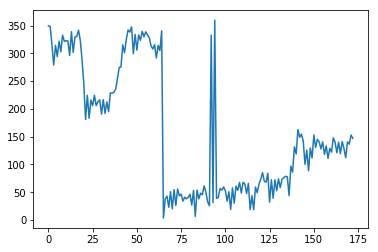

[349.5, 348.4, 314.9, 279.0, 314.5, 294.2, 321.9, 302.8, 332.7, 321.4, 322.7, 322.5, 296.1, 338.9, 301.8, 329.3, 330.3, 341.6, 323.7, 288.8, 245.5, 180.9, 224.6, 183.2, 216.0, 205.7, 224.6, 205.8, 213.0, 216.3, 190.6, 216.6, 191.8, 212.7, 194.9, 228.8, 228.3, 229.7, 235.6, 254.1, 274.7, 275.2, 315.2, 301.1, 324.7, 342.1, 338.2, 347.6, 299.4, 334.2, 305.8, 333.3, 323.4, 339.7, 329.8, 338.7, 333.1, 328.1, 313.3, 308.0, 315.5, 291.7, 314.2, 304.9, 340.7, 3.6999999999999886, 37.69999999999999, 42.89999999999998, 22.899999999999977, 50.89999999999998, 20.100000000000023, 54.5, 26.30000000000001, 55.80000000000001, 43.39999999999998, 46.60000000000002, 33.89999999999998, 40.89999999999998, 38.0, 40.69999999999999, 46.39999999999998, 26.80000000000001, 53.19999999999999, 6.399999999999977, 53.89999999999998, 38.0, 48.30000000000001, 45.39999999999998, 61.5, 49.60000000000002, 32.5, 25.600000000000023, 332.6, 31.399999999999977, 359.6, 38.80000000000001, 40.80000000000001, 56.5, 53.80000000000

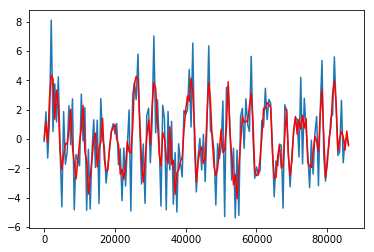

119


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import mpld3
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from math import asin,sin, cos, sqrt, atan2, radians,degrees
mpld3.enable_notebook()


df1=pd.read_csv("plottercsv/liftend.csv")
tm=df1[ 'Time since start in ms ']
angle= df1['ORIENTATION Z (azimuth °)']
print(angle)

angle=[]
for i in range(len(df1)):
    heading =( math.atan2(df1['MAGNETIC FIELD Y (μT)'][i],df1['MAGNETIC FIELD X (μT)'][i]) * (180 / math.pi))+270
    if heading>360:
        heading=heading-360
    angle.append(heading)
#print(angle)


angle=[i+90 for i in df1['ORIENTATION Z (azimuth °)']]
for i in range(len(angle)):
    if(angle[i]>=360):
        angle[i]=angle[i]-360

print(angle)

plt.plot(angle)
plt.show()
val=0.0
ang_lis=[]
tm_lis=[]
tm_lis.append(tm[0])
r1=0.0
r2=0.0
i=0
k=0
list1=[]
while i<len(tm):
    
    r1=angle[k]-1
    r2=angle[k]+1
    if(angle[i]>=r1 and angle[i]<=r2):
        list1.append(angle[i])
        i=i+1
    else:
        ang_lis.append(list1)
        list1=[]
        k=i
        tm_lis.append(tm[k])

angles=[]
for i in range(0,len(ang_lis)):
    angles.append(np.mean(ang_lis[i]))

angles=angle
print(angles)
#plt.plot(df1["ACCELEROMETER X (m/s²)"])
#plt.plot(df1["ACCELEROMETER Y (m/s²)"])
#plt.plot(df1["ACCELEROMETER Z (m/s²)"])
#plt.ylabel('acceleration(m/s2)')
#plt.show()

x=(df1["ACCELEROMETER X (m/s²)"])
y=(df1["ACCELEROMETER Y (m/s²)"])
z=(df1["ACCELEROMETER Z (m/s²)"])
mag=[]
val=0.0
for i in range(len(x)):
    val=(x[i]**2)+( y[i]**2 )+( z[i]**2)
    mag.append(val**0.5)

mag1=mag-(sum(mag)/len(mag))
plt.plot(df1['Time since start in ms '],mag1)

yhat = savgol_filter(mag1,5,3)
plt.plot(df1['Time since start in ms '],yhat, color='red')
plt.show()
peak=[]
time=[]
for i in range(len(mag1)-1):
    if (mag1[i] > mag1[i-1] and (mag1[i] > mag1[i+1])):
        #print(mag1[i])
        peak.append(mag1[i])
        time.append(tm[i])
peak2=[]
time2=[]
for i in range(len(mag1)-1):
    if (mag1[i] < mag1[i-1] and (mag1[i] < mag1[i+1])):
        #print(mag1[i])
        peak2.append(mag1[i])
        time2.append(tm[i])
#print(peak+peak2)
ts=time+time2

print(len(peak+peak2))

In [16]:
lats=33.642938426590604
longs=-117.84197995472256
steps=[1]*(len(angles)-15)
x=len(steps)
df=pd.DataFrame(columns=['latitude', 'longitude', 'heartrate'])
latslis=[]
longlis=[]
glo=pd.DataFrame()
data=finder(lats,longs,steps,angles[10:-5],len(angles)-15,df,0)
print(glo)
glo.to_csv("steps.csv")
filename = gis.content.import_data(glo)
map.add_layer(filename, { "renderer":"SimpleRenderer", "field_name":"heartrate" })


X is 158 


0.00064
5.632177496185701
322.7
X is 157 


0.00064
5.6286868376817125
322.5
X is 156 


0.00064
5.16791991515521
296.1
X is 155 


0.00064
5.9149208350087825
338.9
X is 154 


0.00064
5.267403682518887
301.8
X is 153 


0.00064
5.7473692268173275
329.3
X is 152 


0.00064
5.764822519337271
330.3
X is 151 


0.00064
5.96204472481263
341.6
X is 150 


0.00064
5.649630788705645
323.7
X is 149 


0.00064
5.040510879759624
288.8
X is 148 


0.00064
4.284783313646079
245.5
X is 147 


0.00064
3.1573006168577424
180.9
X is 146 


0.00064
3.920009499979264
224.6
X is 145 


0.00064
3.1974431896536117
183.2
X is 144 


0.00064
3.7699111843077517
216.0
X is 143 


0.00064
3.590142271352336
205.7
X is 142 


0.00064
3.920009499979264
224.6
X is 141 


0.00064
3.5918876006043305
205.8
X is 140 


0.00064
3.717551306747922
213.0
X is 139 


0.00064
3.775147172063735
216.3
X is 138 


0.00064
3.326597554301192
190.6
X is 137 


0.00064
3.7803831598197175
216.6
X is 136 


0.00064
3.3475

In [12]:
map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [91]:
df1.columns

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)',
       'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)',
       'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)',
       'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)',
       'LIGHT (lux)', 'MAGNETIC FIELD X (μT)', 'MAGNETIC FIELD Y (μT)',
       'MAGNETIC FIELD Z (μT)', 'ORIENTATION Z (azimuth °)',
       'ORIENTATION X (pitch °)', 'ORIENTATION Y (roll °)', 'PROXIMITY (i)',
       'SOUND LEVEL (dB)', 'LOCATION Latitude : ', 'LOCATION Longitude : ',
       'LOCATION Altitude ( m)', 'LOCATION Altitude-google ( m)',
       'LOCATION Speed ( Kmh)', 'LOCATION Accuracy ( m)',
       'LOCATION ORIENTATION (°)', 'Satellites in range',
       'Time since start in ms ', 'YYYY-MO-DD HH-MI-SS_SSS'],
      dtype='object')

In [92]:
angle=[]
for i in range(len(df1)):
    heading =( math.atan2(df1['MAGNETIC FIELD Y (μT)'][i],df1['MAGNETIC FIELD X (μT)'][i]) * (180 / math.pi))+270
    if heading>360:
        heading=heading-360
    angle.append(heading)
print(angle)

[221.86522890428006, 236.2178911403218, 233.26717333551062, 226.92518370832315, 137.8155566842112, 96.136020567311, 59.449030126459434, 68.75570811170297, 85.62046993863703, 71.40227951408485, 69.91396703879366, 66.31070737385477, 53.54907682041869, 59.061252536400616, 37.33319573818585, 51.5626985089375, 41.492388040487185, 58.81502534126162, 46.442394697491864, 63.25382472811987, 57.51867941165881, 45.387127754150924, 49.47005747192469, 37.985003147970076, 54.51045642760039, 39.220514174844084, 64.14545758050878, 47.11364764741677, 62.80764783569646, 46.943422517008116, 55.835711869836814, 44.89563621831121, 42.17416543150898, 51.36111788797177, 40.741153877829674, 54.18054195762613, 40.15599962491933, 47.02374383923416, 24.775140568831944, 24.507405230129734, 41.442673402535945, 32.72778139435417, 43.90021611042829, 35.30638120724922, 33.83754668421932, 42.03637934259814, 32.22015876890305, 46.140064033786416, 36.74411128478329, 51.37285752316484, 35.67046035730192, 51.7098368077569

In [93]:
df1['LOCATION Latitude : '][0]

33.64998

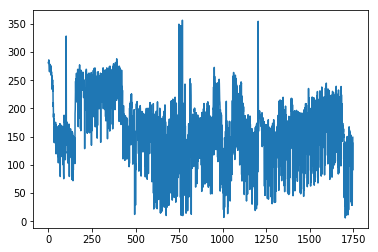

In [12]:
plt.plot(df1['ORIENTATION Z (azimuth °)'])
plt.show()

In [ ]:
33.6430879,-117.8420118 - in room
33.642938426590604,-117.84197995472256 - inlift